<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 3 - Redes Recurrentes y Autoencoders  </H3>
<hr style="height:2px;border:none"/>

**Integrantes**  
* Jorge Núñez C. 201211508-6
* Tomás Ochoa A. 201423007-9


## 2. Autoencoders (AEs) en MNIST

Las RBM’s y posteriormente los AE’s (redes no supervisadas) fueron un componente crucial en el desarrollo de los modelos que entre 2006 y 2010 vigorizaron el área de las redes neuronales artificiales con logros notables de desempeño en diferentes tareas de aprendizaje automático. En esta sección aprenderemos a utilizar el más sencillo de estos modelos: un autoencoder o AE. Consideraremos tres aplicaciones clásicas: reducción de dimensionalidad, *denoising* y pre-entrenamiento. Con este objetivo en mente, utilizaremos un dataset denominado MNIST. Se trata de una colección de 70000 imágenes de 28 $\times$ 28 pixeles correspondientes a dígitos manuscritos (números entre 0 y 9). En su versión tradicional, la colección se encuentra separada en dos subconjuntos: uno de entrenamiento de 60000 imágenes y otro de test de 10000 imágenes. La tarea consiste en construir un programa para que aprenda a identificar correctamente el dı́gito representado en la imagen

> **a)** Se escribe el código que cargue los datos desde el repositorio de keras, normalizando las imágenes de modo que los pixeles queden en [0, 1] y se devuelven tres subconjuntos disjuntos: uno de entrenamiento, uno de validación y uno de pruebas.

Se cargan los datos, se normalizan y dividen en 3 conjuntos (entrenamiento, validación y test) a continuación

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_data = x_train.astype('float32') / 255.
x_train=x_data[:55000]
x_val=x_data[55000:]
x_test = x_test.astype('float32') / 255.
...#Define here your validation set

Using TensorFlow backend.


Ellipsis

### 2.1 Reducción de dimensionalidad

Para esta primera sección, gracias a la simplicidad del problema tratado, se experimenta con un autoencoder tradicional (feed forward) en donde las capas de éste sean densas. Para esto se re estructurarán los datos de entradas en forma de vector, es decir la matriz de 28 × 28 pasa a ser un vector de 784 componentes, lo cual se realiza a continuación.


In [0]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_data = y_train
y_train = y_data[:55000]
y_val = y_data[55000:]


Una de las aplicaciones tı́picas de un AE es reducción de dimensionalidad, es decir, implementar una transformación $\phi:{\rm I\!R}^d \rightarrow {\rm I\!R}^{d'}$ de objetos representados originalmente por $d$ atributos en una nueva representación de $d'$ atributos, de modo tal que se preserve lo mejor posible la “información” original. Obtener tal representación es útil desde un punto de vista computacional (compresión) y estadı́stico (permite construir modelos con un menor número de parámetros libres). Un AE es una técnica de reducción de dimensionalidad no supervisada porque no hace uso de información acerca de las clases a las que pertenecen los datos de entrenamiento.  

> **a)** Se entrena un AE básico (1 capa escondida) para generar una representación de MNIST en 𝑑′= 2, 8, 32, 64 dimensiones.

Se procede a entrenar los 4 autoencoders a continuación con la función de pérdida binary crossentropy

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 
eps=50
input_img = Input(shape=(784,))
encoded = Dense(2, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(2,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history1=autoencoder.fit(x_train,x_train,epochs=eps,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x2.h5')
encoder.save('basic_encoder_768x2.h5')
decoder.save('basic_decoder_768x2.h5')


input_img = Input(shape=(784,))
encoded = Dense(8, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder= Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history2=autoencoder.fit(x_train,x_train,epochs=eps,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x8.h5')
encoder.save('basic_encoder_768x8.h5')
decoder.save('basic_decoder_768x8.h5')

input_img = Input(shape=(784,))
encoded = Dense(32, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history3=autoencoder.fit(x_train,x_train,epochs=eps,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x32.h5')
encoder.save('basic_encoder_768x32.h5')
decoder.save('basic_decoder_768x32.h5')

input_img = Input(shape=(784,))
encoded = Dense(64, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history4=autoencoder.fit(x_train,x_train,epochs=eps,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x64.h5')
encoder.save('basic_encoder_768x64.h5')
decoder.save('basic_decoder_768x64.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages

*Comentario: Para entrenar autoencoder existen dos elecciones comúnes de función de pérdida, MSE y BCE. Para entrenar autoencoders con data de imágenes una elección natural es BCE (la cual se escogió), dado que los valores de pixeles se encuentran normalizados para tomar valores entre 0 y 1, a la vez se desea que la pérdida sea computada para cada componente independientemente, es decir que no se vea afectada por las demas salidas. Así cada pixel reconstruido (componente de salida) será comparado con el pixel que se desea reconstuir para computar la pérdida durante el entrenamiento*

A continuación se guardan los datos del proceso de entrenamiento de cada modelo de modo de poder contar con ellos de manera continua. Para esto inicialmente se almacenan los datos.

In [0]:
datos={}
train_loss1 = history1.history['loss']
val_loss1   = history1.history['val_loss']
train_loss2 = history2.history['loss']
val_loss2   = history2.history['val_loss']
train_loss3 = history3.history['loss']
val_loss3   = history3.history['val_loss']
train_loss4 = history4.history['loss']
val_loss4   = history4.history['val_loss']
datos["train_loss1"] = train_loss1
datos["val_loss1"] = val_loss1
datos["train_loss2"] = train_loss2
datos["val_loss2"] = val_loss2
datos["train_loss3"] = train_loss3
datos["val_loss3"] = val_loss3
datos["train_loss4"] = train_loss4
datos[" val_loss4"] = val_loss4

Luego se monta el drive en google y se guardan los datos en el drive

In [ ]:
!pip install -U -q PyDrive
from google.colab import drive
import json
drive.mount('/content/gdrive')
with open('/content/gdrive/My Drive/ColabNoteb/Datos.json','w') as f:
  json.dump(datos,f)

Luego es posible cargar los datos y extraerlos según cómo se almacenaron

In [0]:
with open('/content/gdrive/My Drive/ColabNoteb/Datos.json') as f:
  datos=json.load(f)
train_loss1 = datos["train_loss1"]
val_loss1 = datos["val_loss1"]
train_loss2 = datos["train_loss2"]
val_loss2 = datos["val_loss2"]
train_loss3 = datos["train_loss3"] 
val_loss3 = datos["val_loss3"]
train_loss4 = datos["train_loss4"] 
val_loss4 = datos[" val_loss4"] 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Se proceden a graficar los resultados obtenidos durante el entrenamiento

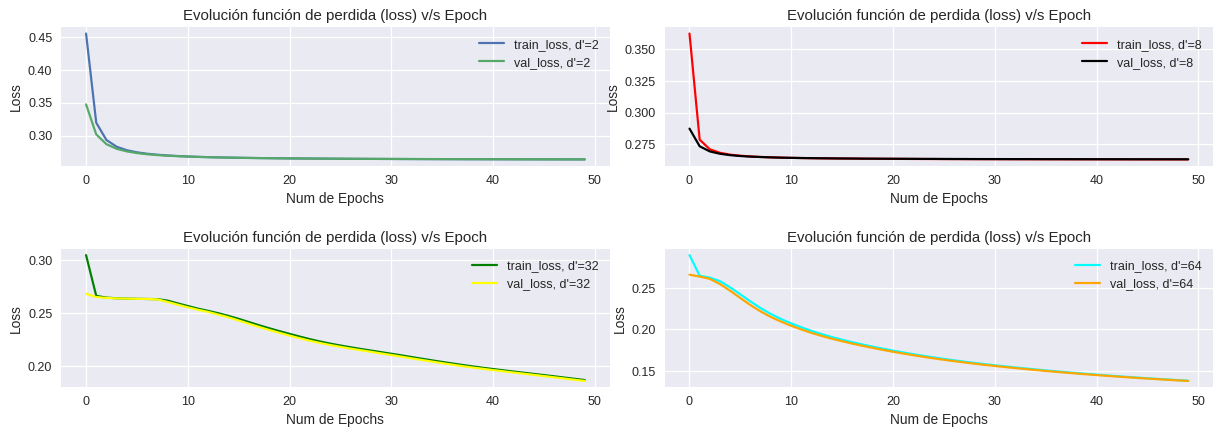

In [0]:
import matplotlib.pyplot as plt
eps=50

xc=range(eps)

plt.figure()
plt.figure(figsize=(8,4), dpi=90)

plt.subplot(2,2,1)
plt.plot(xc,train_loss1 ,label = "train_loss, d'=2")
plt.plot(xc, val_loss1 ,label = "val_loss, d'=2")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(xc,train_loss2 ,'r',label = "train_loss, d'=8")
plt.plot(xc, val_loss2,'k',label = "val_loss, d'=8")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(xc,train_loss3 ,'green',label = "train_loss, d'=32")
plt.plot(xc, val_loss3,'yellow',label = "val_loss, d'=32")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(xc,train_loss4 ,'aqua',label = "train_loss, d'=64")
plt.plot(xc, val_loss4,'orange',label = "val_loss, d'=64")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=0.6,
                    wspace=0.1)
plt.show()

*Comentario: Es posible apreciar que el error de entrenamiento y validación disminuyye notoriamente a medida que se aumenta la dimensión del encoder, dado que es posible extraer más caracterísitcas de la entrada en éste, haciéndo la tarea más simple para el decoder. Bien uno desearía obtener una compresión de la información con la menor dimensionalidad posible desde el punto de vista compotucional, se ve que obtener una compresión de buena calidad será un desafío mayor.*

 ¿Mejora el resultado si elegimos una función de activación ReLU para el Encoder? ¿Podrı́a y/o corresponde utilizar ésta activación en el Decoder?

A continuación se entrenan dos autoencoder con la función de activación relu en el encoder y en el encoder u decoder respectivamente

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 

input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history5=autoencoder.fit(x_train,x_train,epochs=50,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x64_relu.h5')
encoder.save('basic_encoder_768x64_relu.h5')
decoder.save('basic_decoder_768x64_relu.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 

input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='relu')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history6=autoencoder.fit(x_train,x_train,epochs=50,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x64_relu_relu.h5')
encoder.save('basic_encoder_768x64_relu_relu.h5')
decoder.save('basic_decoder_768x64_relu_relu.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


Se almacena la información de entrenamiento

In [0]:
datos2={}
train_loss5 = history5.history['loss']
val_loss5   = history5.history['val_loss']
train_loss6 = history6.history['loss']
val_loss6   = history6.history['val_loss']
datos2["train_loss5"] = train_loss5
datos2["val_loss5"] = val_loss5
datos2["train_loss6"] = train_loss6
datos2["val_loss6"] = val_loss6
with open('/content/gdrive/My Drive/ColabNoteb/Datos2.json','w') as f:
  json.dump(datos2,f)
with open('/content/gdrive/My Drive/ColabNoteb/Datos2.json') as f:
  datos2=json.load(f)

Se grafican los resultados obtenidos

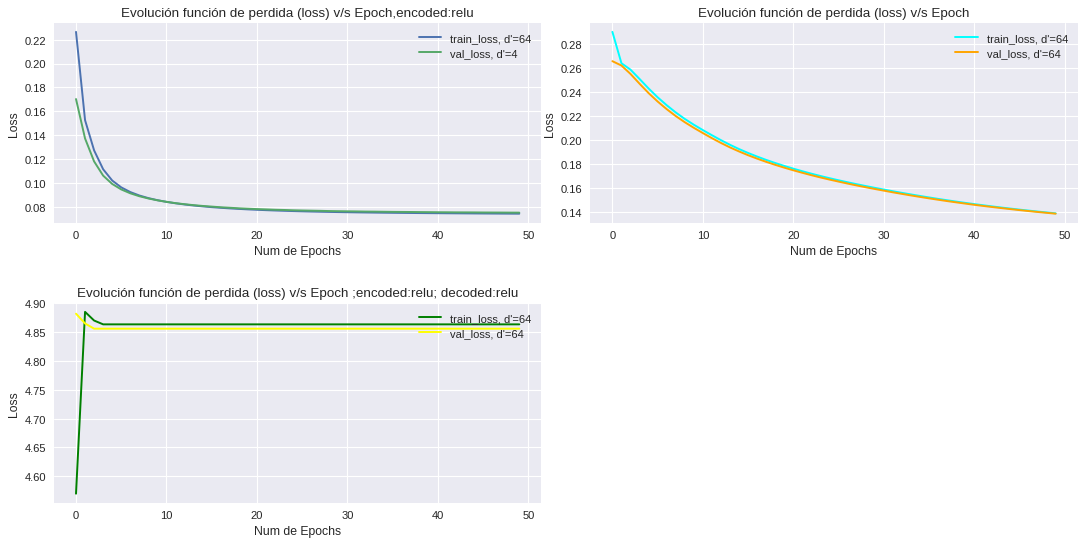

In [0]:
train_loss5 = datos2["train_loss5"]
val_loss5 = datos2["val_loss5"]
train_loss6 = datos2["train_loss6"]
val_loss6 = datos2["val_loss6"]
import matplotlib.pyplot as plt
eps=50
xc=range(eps)

plt.figure()
plt.figure(figsize=(8,6), dpi=80)

plt.subplot(2,2,1)
plt.plot(xc,train_loss5 ,label = "train_loss, d'=64")
plt.plot(xc, val_loss5 ,label = "val_loss, d'=4")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch,encoded:relu')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(xc,train_loss6 ,'green',label = "train_loss, d'=64")
plt.plot(xc, val_loss6,'yellow',label = "val_loss, d'=64")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch ;encoded:relu; decoded:relu')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(xc,train_loss4 ,'aqua',label = "train_loss, d'=64")
plt.plot(xc, val_loss4,'orange',label = "val_loss, d'=64")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')


plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=0.4,
                    wspace=0.1)
plt.show()

*Comentario: Se aprecia a la derecha el caso del autoencoder con dimensionalidad d'= 64, es posible comparar con el AE con la función de activación relu en el encoder, la cual obtiene un resultado de mejor calidad, y con el caso de encoder y decoder con relu, la cual obtiene un resultado de pésima calidad. Esto es debido a que se requieren salidas entre 0 y 1, lo cual no es siempre correcto al utilizar la función relu y sí para la función sigmoidal, por lo cual utilizar relu conllevará una complicación no necesaria y se optará por utilizar la función sigmoidal dado el resultado obtenido.*

> **b)** Se compara visualmente la reconstrucción que logra hacer el autoencoder desde la representación en ${\rm I\!R}^{d'}$ para algunas imágenes del conjunto de pruebas.

Se cargan los modelos y se procede a graficar tanto la entrada como salida de los AE entrenados en el punto a)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Modelo d'= 2


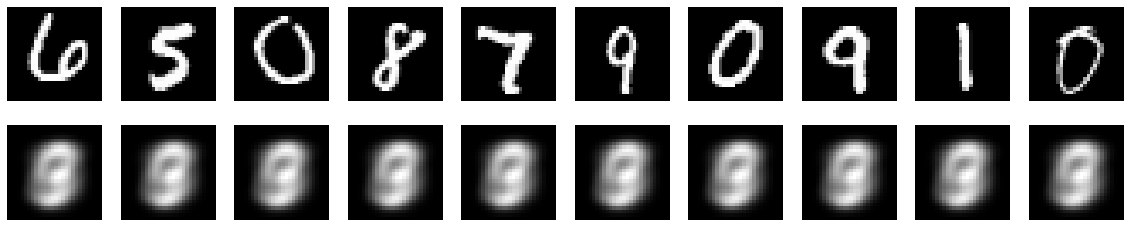

Modelo d'= 8


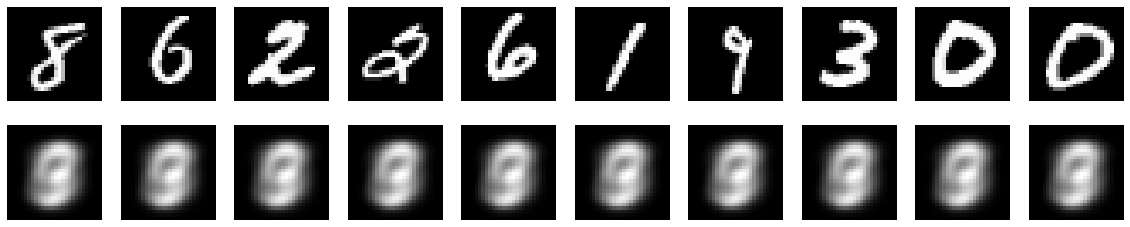

Modelo d'= 32


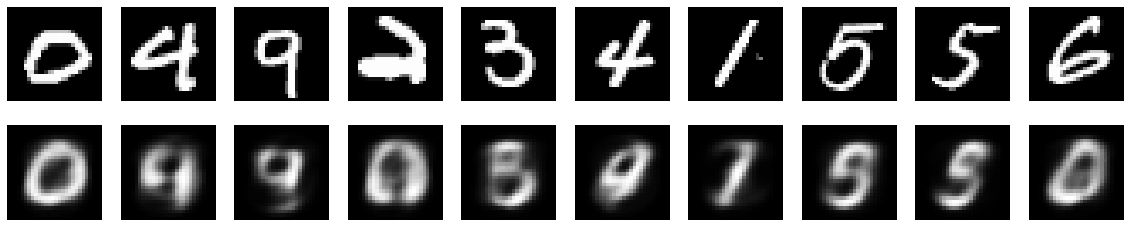

Modelo d'= 64


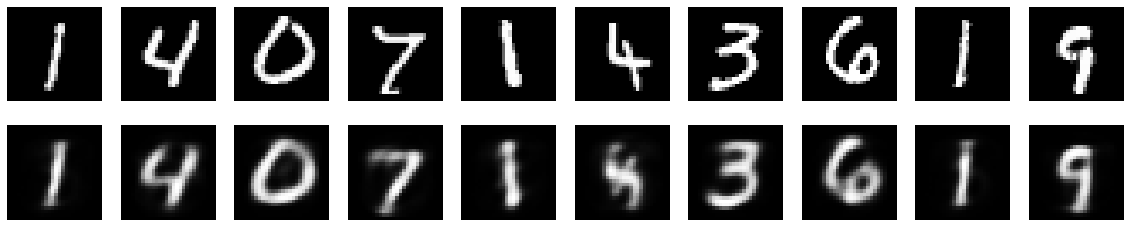

In [0]:
from keras.models import load_model
datos_AE = ['basic_autoencoderr_768x2.h5','basic_autoencoderr_768x8.h5','basic_autoencoderr_768x32.h5','basic_autoencoderr_768x64.h5']
datos_EN = ['basic_encoder_768x2.h5','basic_encoder_768x8.h5','basic_encoder_768x32.h5','basic_encoder_768x64.h5']
datos_DE = ['basic_decoder_768x2.h5','basic_decoder_768x8.h5','basic_decoder_768x32.h5','basic_decoder_768x64.h5']
dimension = [2,8,32,64]
for m in range(len(datos_AE)):
  
  autoencoder = load_model(datos_AE[m])
  encoder= load_model(datos_EN[m])
  decoder= load_model(datos_DE[m])
  
  encoded_test = encoder.predict(x_test)
  decoded_test = decoder.predict(encoded_test)
  import matplotlib.pyplot as plt
  n = 10
  print("Modelo d'=",dimension[m])
  plt.figure(figsize=(20, 4))
  for i in range(n):
      j = np.random.randint(0,len(x_test))
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[j].reshape(28, 28),cmap='gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax = plt.subplot(2, n, i + 1 + n)
      
      plt.imshow(decoded_test[j].reshape(28, 28),cmap='gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

*Comentario: Se aprecia, tal como en el error de validación, que a medida que se aumenta el tamaño de d' es posible obtener una mejor reconstrucción de la imágen de entrada.*

Ahora se realiza la comparación visual de los AE entrenados en el punto b) y el mejor caso del punto a)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Modelo Dimension=64


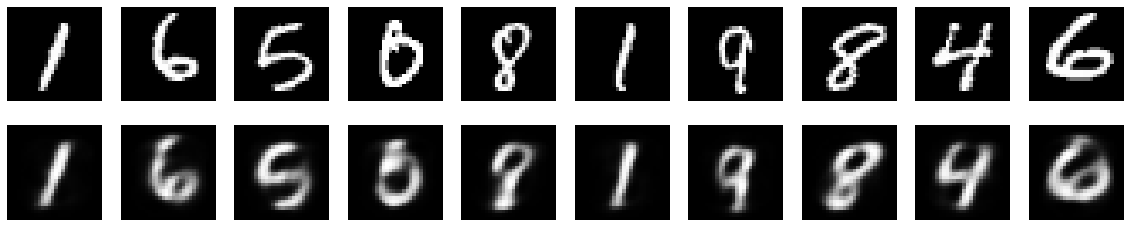

Modelo relu en encoded


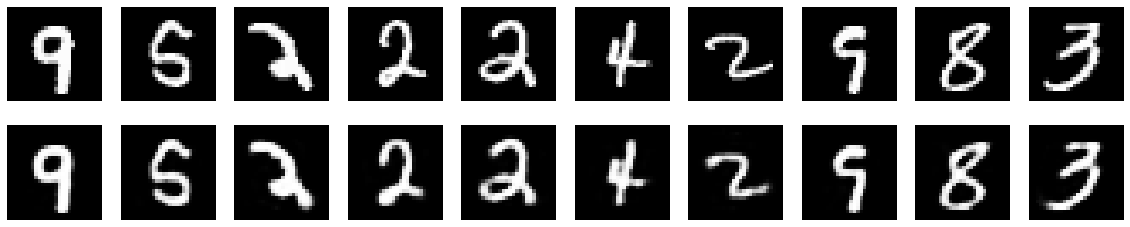

Modelo relu en encoded y decoded


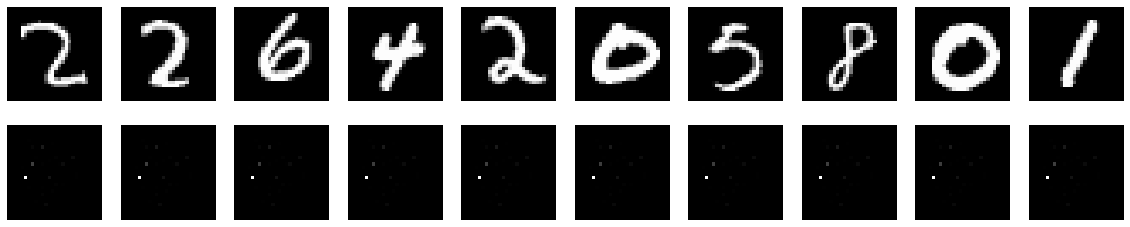

In [0]:
from keras.models import load_model
datos_AE2 = ['basic_autoencoderr_768x64.h5','basic_autoencoder_768x64_relu.h5','basic_autoencoder_768x64_relu_relu.h5']
datos_EN2 = ['basic_encoder_768x64.h5','basic_encoder_768x64_relu.h5','basic_encoder_768x64_relu_relu.h5']
datos_DE2 = ['basic_decoder_768x64.h5','basic_decoder_768x64_relu.h5','basic_decoder_768x64_relu_relu.h5']
dimension =['Modelo Dimension=64','Modelo relu en encoded','Modelo relu en encoded y decoded']
for m in range(len(datos_AE2)):
  
  autoencoder = load_model(datos_AE2[m])
  encoder= load_model(datos_EN2[m])
  decoder= load_model(datos_DE2[m])
  
  encoded_test = encoder.predict(x_test)
  decoded_test = decoder.predict(encoded_test)
  import matplotlib.pyplot as plt
  n = 10
  print(dimension[m])
  c+=1
  plt.figure(figsize=(20, 4))
  for i in range(n):
      j = np.random.randint(0,len(x_test))
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[j].reshape(28, 28),cmap='gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_test[j].reshape(28, 28),cmap='gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

*Comentario: Se aprecia que el utilizar la función relu en la capa del encoder aportó inmensamente a mejorar la representación obtenida, siendo esta de una inmensa calidad. Nuevamente se ve que la representación obtenida utilizando la función de activación relu en el decoder no es deseada. Es posible concluir que la calidad de las representaciones visuales calzan con los errores de validación obtenidos.*

> **c)** Para verificar la calidad de la representación obtenida, se implementa el clasificador denominado 𝑘𝑁𝑁 (k-nearest neighbor): dada una imagen 𝑥, el clasificador busca las k = 10 imágenes de entrenamiento más similares (de acuerdo a una distancia, e.g. euclidiana) y predice como clase, la etiqueta más popular entre las imágenes cercanas. Se mide el error de pruebas obtenido construyendo este clasificador sobre la data reducida a través del autoencoder comparando con la representación reducida obtenida vía PCA (una técnica clásica de reducción de dimensionalidad) utilizando el mismo número de dimensiones 𝑑′= 2, 8, 32,64.

Se procede a calcular el accuracy de clasificación tanto para PCA como por los autoencoders entrenados en el punto a), para ésto se comparan los resultados para las dimensionalidades respectivas

In [0]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model
import numpy as np
datos_AE = ['basic_autoencoderr_768x2.h5','basic_autoencoderr_768x8.h5','basic_autoencoderr_768x32.h5','basic_autoencoderr_768x64.h5']
datos_EN = ['basic_encoder_768x2.h5','basic_encoder_768x8.h5','basic_encoder_768x32.h5','basic_encoder_768x64.h5']
datos_DE = ['basic_decoder_768x2.h5','basic_decoder_768x8.h5','basic_decoder_768x32.h5','basic_decoder_768x64.h5']
d=[2,8,32,64]
pca_cl=[]
autoenc=[]
for m in range(len(d)):
  pca = PCA(n_components=d[m])
  pca.fit(x_train)
  pca_train = pca.transform(x_train)
  pca_test = pca.transform(x_test)
  ...#AUTOENCODER
  
  autoencoder = load_model(datos_AE[m])
  encoder= load_model(datos_EN[m])
  decoder= load_model(datos_DE[m])
  encoded_train = encoder.predict(x_train)
  encoded_test = encoder.predict(x_test)
  ...#CLASIFICATION
  
  clf = KNeighborsClassifier(10)
  clf.fit(pca_train, y_train)
  a=clf.score(pca_test,y_test)
  print('')
  print ('Classification Accuracy PCA ',a,"; d'=",d[m])
  
  pca_cl.append(a)
  
  clf = KNeighborsClassifier(10)
  clf.fit(encoded_train, y_train)
  b=clf.score(encoded_test,y_test)
  
  print ('Classification Accuracy ',b,"; d'=",d[m])
  autoenc.append(b)
  print('')
  print('')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



Classification Accuracy PCA  0.4378 ; d'= 2
Classification Accuracy  0.1642 ; d'= 2




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



Classification Accuracy PCA  0.9027 ; d'= 8
Classification Accuracy  0.4563 ; d'= 8




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



Classification Accuracy PCA  0.9735 ; d'= 32
Classification Accuracy  0.8694 ; d'= 32




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



Classification Accuracy PCA  0.9729 ; d'= 64
Classification Accuracy  0.9559 ; d'= 64




*Comentario: Se aprecia que el resultado obtenido mediante PCA es de calidad superior respecto a los autoencoders entrenados. A la vez se aprecia un comportamiento anómalo, dado que del aumento de dimensionalidad de 32 a 64 sufre una caída en su accuracy, lo cual no calza con el desempeño obtenido mediante los autoencoders entrenados.*

A continuación se grafican los resultados obtenidos.

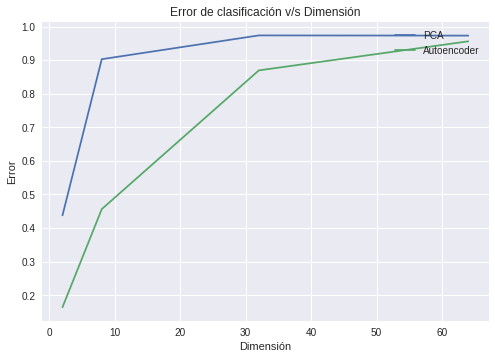

In [0]:
import matplotlib.pyplot as plt
d=[2,8,32,64]
plt.plot(d,pca_cl,label = "PCA")
plt.plot(d,autoenc,label = "Autoencoder")
plt.legend(loc='upper right')
plt.title('Error de clasificación v/s Dimensión')
plt.xlabel('Dimensión')
plt.ylabel('Error')
plt.show()


*Comentario: Se aprecia que la técnica PCA también cuenta con la dificultad de realizar una compresión de buena calidad contando con baja dimensionalidad. Aún así, es superior a los resultados obtenidos en el ítem a). Se estima que para d' de tamaño 64 nuestro autoencoder es capaz de generalizar dado el accuracy obtenido, a la vez la técnica PCA es capaz de generalizar de buena manera a partir de d'=32.*

> **d)** Se modifica el autoencoder básico construido en (a) para implementar un deep autoencoder (deep AE), es decir, un autoencoder con al menos dos capas ocultas. Se demuestra experimentalmente que este autoencoder puede mejorar la compresión obtenida por PCA utilizando el mismo número de dimensiones 𝑑′ . Se experimenta con 𝑑′ =2, 8,32,64 y distintas profundidades ($L \in [2,4]$).

Se entrenan los siguientes deep AE (d'=2,8,32,64) utilizando la función de activación relu en todas las capas con excepción de la capa de salida.

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 

target_dim = 2
input_img = Input(shape=(784,))
encoded1 = Dense(1000, activation='relu')(input_img)
encoded2 = Dense(500, activation='relu')(encoded1)
encoded3 = Dense(250, activation='relu')(encoded2)
encoded4 = Dense(target_dim, activation='relu')(encoded3)
decoded4 = Dense(250, activation='relu')(encoded4)
decoded3 = Dense(500, activation='relu')(encoded4)
decoded2 = Dense(1000, activation='relu')(decoded3)
decoded1 = Dense(784, activation='sigmoid')(decoded2)
autoencoder = Model(input=input_img, output=decoded1)
encoder = Model(input=input_img, output=encoded3)
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=40,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('my_autoencoder_768x1000x500x250x2.h5')
encoder.save('my_encoder_768x1000x500x250x2.h5')

target_dim = 8
input_img = Input(shape=(784,))
encoded1 = Dense(1000, activation='relu')(input_img)
encoded2 = Dense(500, activation='relu')(encoded1)
encoded3 = Dense(250, activation='relu')(encoded2)
encoded4 = Dense(target_dim, activation='relu')(encoded3)
decoded4 = Dense(250, activation='relu')(encoded4)
decoded3 = Dense(500, activation='relu')(encoded4)
decoded2 = Dense(1000, activation='relu')(decoded3)
decoded1 = Dense(784, activation='sigmoid')(decoded2)
autoencoder = Model(input=input_img, output=decoded1)
encoder = Model(input=input_img, output=encoded3)
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=40,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('my_autoencoder_768x1000x500x250x8.h5')
encoder.save('my_encoder_768x1000x500x250x8.h5')

target_dim = 32
input_img = Input(shape=(784,))
encoded1 = Dense(1000, activation='relu')(input_img)
encoded2 = Dense(500, activation='relu')(encoded1)
encoded3 = Dense(250, activation='relu')(encoded2)
encoded4 = Dense(target_dim, activation='relu')(encoded3)
decoded4 = Dense(250, activation='relu')(encoded4)
decoded3 = Dense(500, activation='relu')(decoded4)
decoded2 = Dense(1000, activation='relu')(decoded3)
decoded1 = Dense(784, activation='sigmoid')(decoded2)
autoencoder = Model(input=input_img, output=decoded1)
encoder = Model(input=input_img, output=encoded3)
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=40,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('my_autoencoder_768x1000x500x250x32.h5')
encoder.save('my_encoder_768x1000x500x250x32.h5')

target_dim = 64
input_img = Input(shape=(784,))
encoded1 = Dense(1000, activation='relu')(input_img)
encoded2 = Dense(500, activation='relu')(encoded1)
encoded3 = Dense(250, activation='relu')(encoded2)
encoded4 = Dense(target_dim, activation='relu')(encoded3)
decoded4 = Dense(250, activation='relu')(encoded4)
decoded3 = Dense(500, activation='relu')(decoded4)
decoded2 = Dense(1000, activation='relu')(decoded3)
decoded1 = Dense(784, activation='sigmoid')(decoded2)
autoencoder = Model(input=input_img, output=decoded1)
encoder = Model(input=input_img, output=encoded3)
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=40,verbose=0,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('my_autoencoder_768x1000x500x250x64.h5')
encoder.save('my_encoder_768x1000x500x250x64.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `M

Se repite el proceso para contar con los accuracy asociados a los deep AE's y PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model
import numpy as np
datos_AE2 = ['my_autoencoder_768x1000x500x250x2.h5','my_autoencoder_768x1000x500x250x8.h5','my_autoencoder_768x1000x500x250x32.h5','my_autoencoder_768x1000x500x250x64.h5']
datos_EN2 = ['my_encoder_768x1000x500x250x2.h5','my_encoder_768x1000x500x250x8.h5','my_encoder_768x1000x500x250x32.h5','my_encoder_768x1000x500x250x64.h5']

d=[2,8,32,64]
pca_cl2=[]
autoenc2=[]
for m in range(len(d)):
  pca = PCA(n_components=d[m])
  pca.fit(x_train)
  pca_train = pca.transform(x_train)
  pca_test = pca.transform(x_test)
  ...#AUTOENCODER
  
  autoencoder = load_model(datos_AE2[m])
  encoder= load_model(datos_EN2[m])
 
  encoded_train = encoder.predict(x_train)
  encoded_test = encoder.predict(x_test)
  ...#CLASIFICATION
  
  clf = KNeighborsClassifier(10)
  clf.fit(pca_train, y_train)
  a=clf.score(pca_test,y_test)
  print('')
  print ('Classification Accuracy PCA ',a,"; d'=",d[m])
  
  pca_cl2.append(a)
  
  clf = KNeighborsClassifier(10)
  clf.fit(encoded_train, y_train)
  b=clf.score(encoded_test,y_test)
  
  print ('Classification Accuracy ',b,"; d'=",d[m])
  
  autoenc2.append(b)
  
  print('')
  print('')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



Classification Accuracy PCA  0.4377 ; d'= 2
Classification Accuracy  0.9709 ; d'= 2




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



Classification Accuracy PCA  0.9025 ; d'= 8
Classification Accuracy  0.9704 ; d'= 8




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



Classification Accuracy PCA  0.9742 ; d'= 32
Classification Accuracy  0.9714 ; d'= 32




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



Classification Accuracy PCA  0.9729 ; d'= 64
Classification Accuracy  0.9689 ; d'= 64




*Comentario: Se aprecia que se mejora notoriamente el desempeño obtenido previamente para menores dimensionalidades, superando para esto casos a la representación PCA (d'=2,8), aún para dimensionalidades mayores (d'=32,64) es superior el empleo de la técnica PCA respecto a los accuracy obtenidos.*

Se procede a graficar los resultados obtenidos

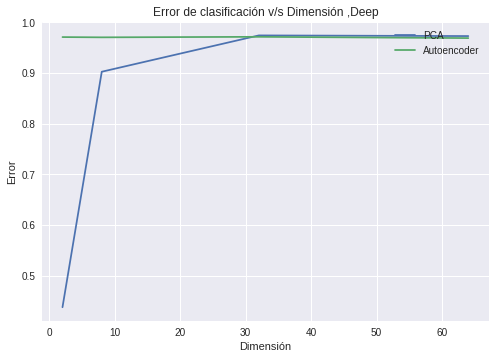

In [0]:
import matplotlib.pyplot as plt
d=[2,8,32,64]
plt.plot(d,pca_cl2,label = "PCA")
plt.plot(d,autoenc2,label = "Autoencoder")
plt.legend(loc='upper right')
plt.title('Error de clasificación v/s Dimensión ,Deep')
plt.xlabel('Dimensión')
plt.ylabel('Error')
plt.show()


*Comentario: Se aprecia que los deep AE obtienen un accuracy constante independiente del d', existen desviaciones leves, sin embargo el PCA, tal como los AE shallow, posee un accuracy deficiente para dimensionalidades pequeñas. Para fines prácticos obtener una representación de baja dimensionalidad para la compresión es áltamente apreciado desde el punto de vista computacional, pudiéndose posicionar la utilización de deep AE como superior a la representación por medio de PCA. Además por medio de corrección de la cantidad de neuronas, funciones de activación, técnicas de entrenamiento, etc... es posible aún para los deep AE superar la técnica PCA, dado que ésta no tiene la posibilidad de ser mejorada por medio de técnicas de entrenamiento, ya que simplemente no se entrena.*

> e) Se escoge la representación aprendida anteriormente del deep AE de tamaño d'= 64 y se visualiza usando la herramienta TSNE disponible en la librerı́a sklearn. Se compara cualitativamente el resultado con aquel obtenido usando PCA con el mismo número de componentes (𝑑 = 64). Finalmente se grafica una representación generada por un autoencoder directamente (𝑑=2).

Visualizacion clasificacion deep autoencoder d' = 64.

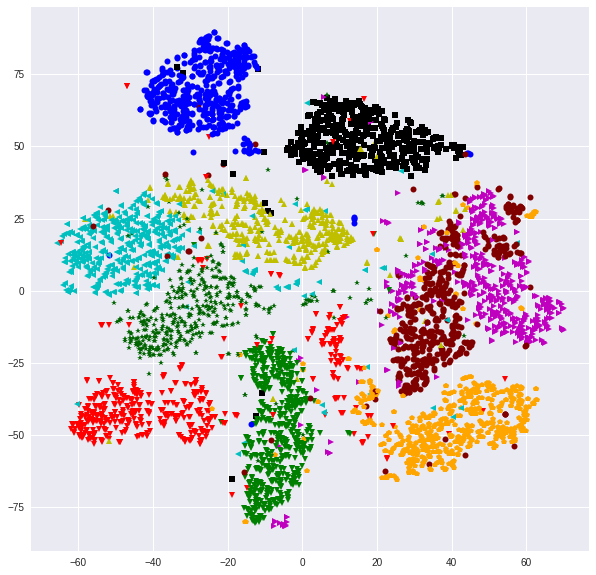

In [0]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
nplot=5000 #warning: mind your memory!
encoder= load_model('my_autoencoder_768x1000x500x250x64.h5')
encoded_train = encoder.predict(x_train[:nplot])
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'v',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'o'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)




*Comentario: Se aprecia una separación entre los distintos números que se desean clasificar, lográndose distinguir la separación de los 10 grupos (números) dentro del plano bidimensional. Se ve que la cercanía entre grupos se debe a la cercanía en apariencia de estos números, por ejemplo los números 4 y 9 (morado y café) se encuentran un tanto revueltos en el plano, dado que la diferencia entre ambos se sustenta en cómo se cierran en su mitad superior, siendo en el caso del para el nueve en forma circular, mientras para el número cuatro sin un cierre efectivo en su parte superior, incluso en el caso real sucede que al ver cuadernos de compañeros es posible experimentar esta confusión.*

Se obtiene la representación por PCA

In [0]:
nplot=5000
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
pca = PCA(n_components=64)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]

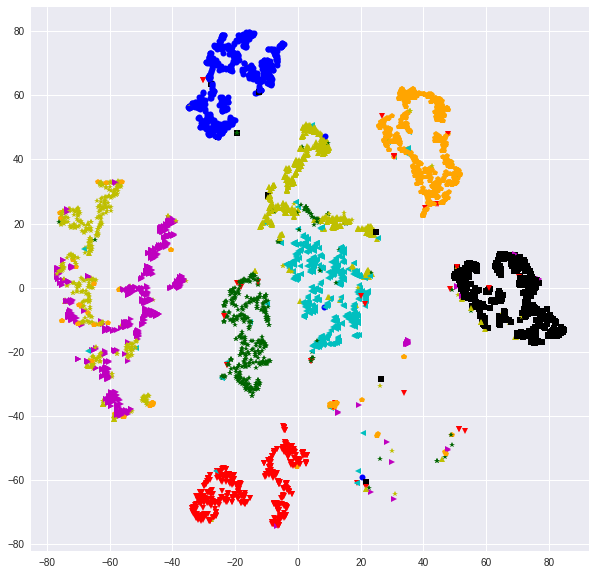

In [0]:

encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'y'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'*'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

*Comentario: Se observa que PCA obtiene buenos resultados de clasificacion en comparacion al mejor modelo anterior (Deep) en el cual se nota una menor distancia entre las distintas clases. Sin embargo se aprecia aún la cercanía entre las clases correspondientes al número 4 y 9.*

Visualizacion deep autoencoder d'=2

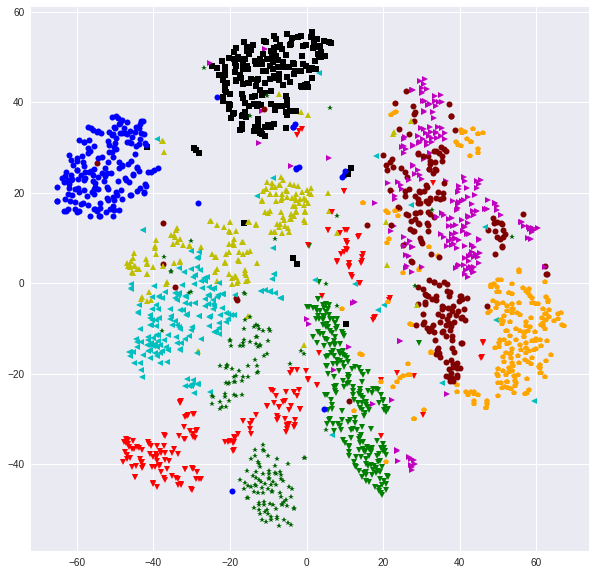

In [0]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
nplot=2000 #warning: mind your memory!
encoder= load_model('my_autoencoder_768x1000x500x250x2.h5')
encoded_train = encoder.predict(x_train[:nplot])
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'v',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'o'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)


*Comentario: Se aprecia un comportamiento similar al deep AE de tamaño 64, en concordancia con el accuracy obtenido previamente.*

> **f)** Cuando el problema se torna más difícil es necesario complejizar el modelo. Se modifica el autoencoder construido en (a) para trabajar directamente sobre las imágenes de MNIST, sin tratarlas como vectores de 784 atributos, sino como matrices de tamaño 1×28×28. Es posible lograr este objetivo utilizando capas convolucionales para definir el Encoder y capas con convoluciones transpuesta en el Decoder.

Se procede a entrenar el deep AE utilizando capas convolucionales

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 

x_traincv = np.reshape(x_train, (len(x_train), 28, 28, 1)) #modify for th dim ordering
x_valcv = np.reshape(x_val, (len(x_val), 28, 28, 1))
from keras.layers import *
input_img = Input(shape=(28, 28, 1))
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
history_cv=autoencoder.fit(x_traincv,x_traincv,epochs=40,batch_size=32,validation_data=(x_valcv,x_valcv))
autoencoder.save('my_autoencoder_1x28x28_conv.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 16)          2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 16)        0         
__________

*Comentario: Se aprecia que la entrada de dimensión 28x28 pasa por una capa convolucional con padding 'same' de modo que no se altera su dimensionalidad en los ocho filtros utilizados, estos filtros pasan por una capa pooling de modo de reducir a la mitad cada una de sus dimensiones, resultando una matriz (14,14,8), luego ésta pasa por una capa convolucional de padding 'same' con 16 filtros, luego una capa pooling reduce nuevamente ambas dimensiones a su mitad, hasta acá se define el encoder, el decoder se encargará de recuperar las dimensiones iniciales de entreda, para esto una capa convolucional transpuesta de padding 'same' de 16 filtros acoje la entrada y expulsa una salida de dimensión (7,7,16), la cual es aumentada por una capa up_sampling, convirtiendo su entrada en una salida (14,14,16), luego se vuelve a repetir estos últimos dos pasos con una capa convolucional transpuesta de 8 filtros y un up_sampling de modo de obtener una salida (28,28,8) que es entragada a un último filtro de una capa convolucional transpuesta. *

Se grafica el resultado obtenido

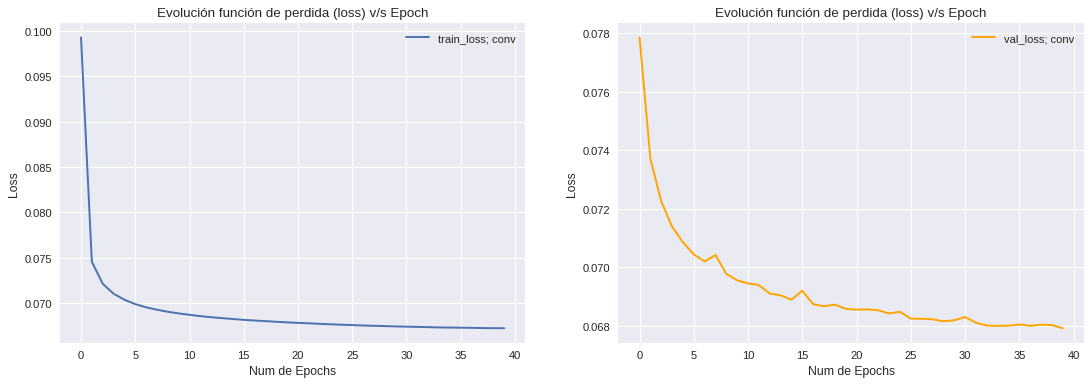

In [0]:
loss_cv=history_cv.history['loss']
val_loss_cv=history_cv.history['val_loss']
import matplotlib.pyplot as plt
eps=40

xc = range(eps)

plt.figure()
plt.figure(figsize=(8,4), dpi=80)

plt.subplot(1,2,1)
plt.plot(xc,loss_cv ,label = "train_loss; conv")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(xc, val_loss_cv,'orange',label = "val_loss; conv")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=1.2,
                    wspace=0.2)
plt.show()

*Comentario: Se logra un muy buen resultado, lográndose el menor error de validación para el último epoch. A la vez este resultado es el mejor obtenido hasta el momento.*

Se procede a visualizar el resultado obtenido

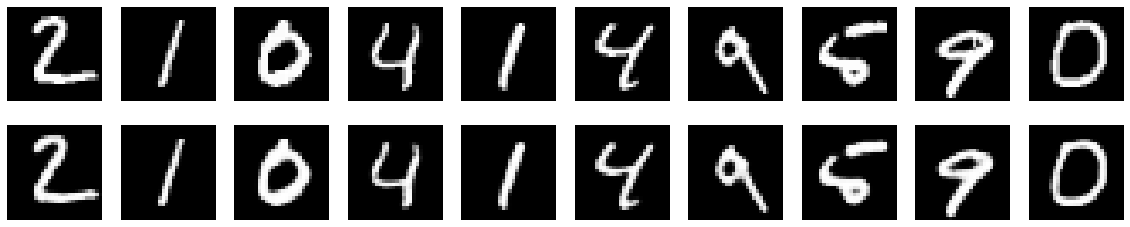

In [0]:
x_testcv = np.reshape(x_test, (len(x_test), 28, 28, 1))
from keras.models import load_model
autoencoder=load_model('my_autoencoder_1x28x28_conv.h5')
decoded_imgs = autoencoder.predict(x_testcv)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    i+=1
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

*Comentario: Se obtiene una copia exitosa de la entrada, prácticamente idéntica, la única diferencia distingible es en el penúltimo número visualizado, el 9 de entrada posee un rayon dentro de su círculo, el cual no es detectable por el autoencoder.*

### 2.2 Denoising

Como se ha discutido en clases, un denoising autoencoder (dAE) es escencialmente un autoencoder entrenado para reconstruir ejemplos parcialmente corruptos. Varios autores han demostrado que mediante esta modificación simple es posible obtener representaciones más robustas y significativas que aquellas obtenidas por un AE básico. En esta sección exploraremos la aplicación más “natural” o “directa” del método.

> **a)** Se genera artificialmente una versión corrupta de las imágenes en MNIST utilizando el siguiente modelo de ruido (masking noise): si $ x \in {\rm I\!R}^d $ es una de las imágenes originales, la versión ruidosa $\tilde{x}$ se obtiene como $\tilde{x} = x \odot \xi$ donde $\odot$ denota el producto de Hadamard (componente a componente) y $\xi \in {\rm I\!R}^d$ es un vector aleatorio binario con componentes *Ber(p)* independientes.

Se cargan los datos de train y test desde la data (mnist) y se normalizan entre 0 y 1.

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_data = x_train.astype('float32') / 255.
x_train=x_data[:55000]
x_val=x_data[55000:]
x_test = x_test.astype('float32') / 255.
y_data = y_train
y_train = y_data[:55000]
y_val = y_data[55000:]
y_test = y_test
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

Se procede a generar las imagenes que contienen ruido tipo (masking noise)

In [0]:
from numpy.random import binomial
noise_level = 0.1
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask

noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask

noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask

> b) Se entrena un autoencoder para reconstruir las imágenes corruptas generadas en el ı́tem anterior.

Se entrenan dAE experimentando con distintos niveles de ruido.

In [0]:
from numpy.random import binomial
eps=30
noise_level = 0.1
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train_01 = x_train*noise_mask

noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val_01 = x_val*noise_mask

noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test_01 = x_test*noise_mask

from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 
eps=30
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history_01=autoencoder.fit(noisy_x_train, x_train, epochs=eps,verbose=1, batch_size=32, validation_data=(noisy_x_val, x_val))
train_loss = history_01.history['loss']
val_loss  = history_01.history['val_loss']
datos_22["train_loss_01"] = train_loss
datos_22["val_loss_01"] = val_loss
autoencoder.save('basic_autoencoder_noisy_768x64_01.h5')
encoder.save('basic_encoder_noisy_768x64.h5_01.h5')
decoder.save('basic_decoder_noisy_768x64.h5_01.h5')


from numpy.random import binomial
eps=30
noise_level = 0.5
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train_05 = x_train*noise_mask

noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val_05 = x_val*noise_mask

noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test_05 = x_test*noise_mask

from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 
eps=30
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history_01=autoencoder.fit(noisy_x_train_05, x_train, epochs=eps,verbose=1, batch_size=32, validation_data=(noisy_x_val_05, x_val))
train_loss = history_01.history['loss']
val_loss  = history_01.history['val_loss']
datos_22["train_loss_05"] = train_loss
datos_22["val_loss_05"] = val_loss
autoencoder.save('basic_autoencoder_noisy_768x64_05.h5')
encoder.save('basic_encoder_noisy_768x64.h5_05.h5')
decoder.save('basic_decoder_noisy_768x64.h5_05.h5')


from numpy.random import binomial
eps=30
noise_level = 0.9
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train_09 = x_train*noise_mask

noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val_09 = x_val*noise_mask

noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test_09 = x_test*noise_mask

from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 
eps=30
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history_01=autoencoder.fit(noisy_x_train_09, x_train, epochs=eps,verbose=1, batch_size=32, validation_data=(noisy_x_val_09, x_val))
train_loss = history_01.history['loss']
val_loss  = history_01.history['val_loss']
datos_22["train_loss_09"] = train_loss
datos_22["val_loss_09"] = val_loss
autoencoder.save('basic_autoencoder_noisy_768x64_09.h5')
encoder.save('basic_encoder_noisy_768x64.h5_09.h5')
decoder.save('basic_decoder_noisy_768x64.h5_09.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 136us/step - loss: 0.3228 - val_loss: 0.2643
Epoch 2/30
55000/55000 [==============================] - 7s 135us/step - loss: 0.2619 - val_loss: 0.2589
Epoch 3/30
55000/55000 [==============================] - 7s 132us/step - loss: 0.2540 - val_loss: 0.2486
Epoch 4/30
55000/55000 [==============================] - 7s 134us/step - loss: 0.2437 - val_loss: 0.2387
Epoch 5/30
55000/55000 [==============================] - 7s 131us/step - loss: 0.2341 - val_loss: 0.2295
Epoch 6/30
55000/55000 [==============================] - 7s 135us/step - loss: 0.2260 - val_loss: 0.2228
Epoch 7/30
55000/55000 [==============================] - 7s 130us/step - loss: 0.2204 - val_loss: 0.2183
Epoch 8/30
55000/55000 [==============================] - 7s 133us/step - loss: 0.2166 - val_loss: 0.2151
Epoch 9/30
55000/55000 [==============================] - 7s 132us/step - loss: 0.2136 - val_loss: 0.21

Se proceden a graficar los resultados obtenidos

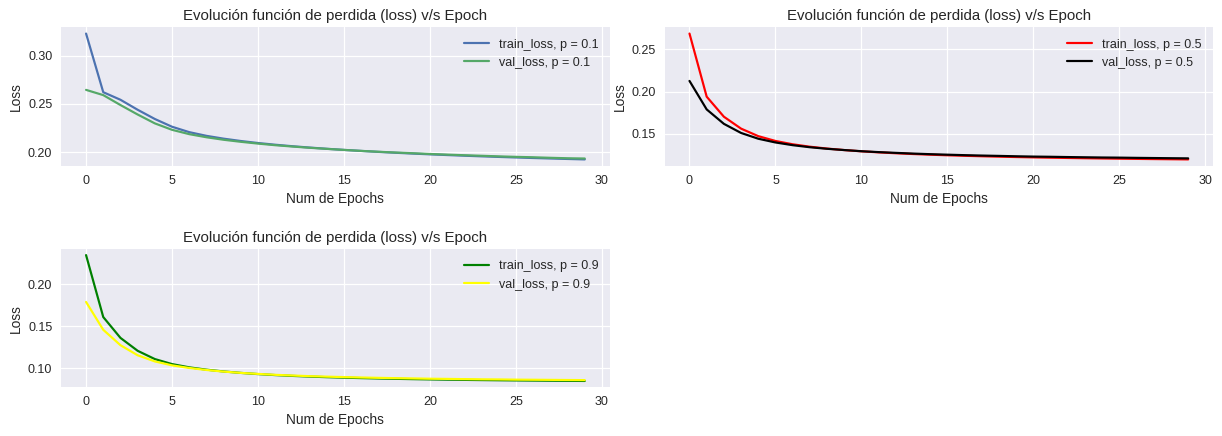

In [54]:
train_loss1 = datos_22["train_loss_01"]
val_loss1 = datos_22["val_loss_01"]
train_loss2 = datos_22["train_loss_05"]
val_loss2 = datos_22["val_loss_05"]
train_loss3 = datos_22["train_loss_09"] 
val_loss3 = datos_22["val_loss_09"]
import matplotlib.pyplot as plt
eps=30
xc         = range(eps)
plt.figure()
plt.figure(figsize=(8,4), dpi=90)

plt.subplot(2,2,1)
plt.plot(xc,train_loss1 ,label = "train_loss, p = 0.1")
plt.plot(xc, val_loss1 ,label = "val_loss, p = 0.1")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(xc,train_loss2 ,'r',label = "train_loss, p = 0.5")
plt.plot(xc, val_loss2,'k',label = "val_loss, p = 0.5")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,3)
plt.plot(xc,train_loss3 ,'green',label = "train_loss, p = 0.9")
plt.plot(xc, val_loss3,'yellow',label = "val_loss, p = 0.9")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')


plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=0.6,
                    wspace=0.1)
plt.show()

*Comentario: Se aprecia que a medida que disminuye el nivel de ruido diminuyen los errores de entrenamiento y validación, lo cual es áltamente intuitivo.*

Se proceden a visualizar las imágenes corruptas y su reconstrucción

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


noisy_level =0.1


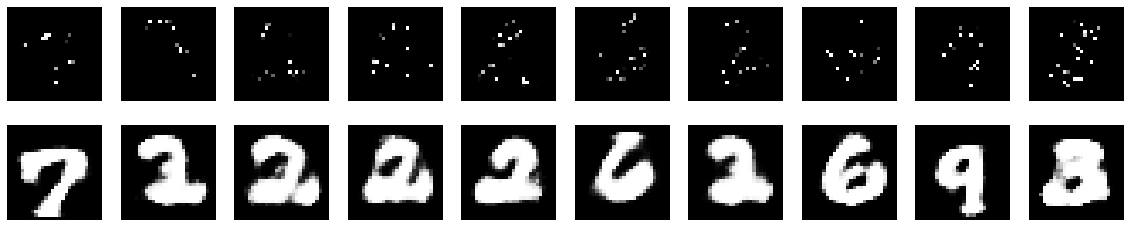

noisy_level =0.5


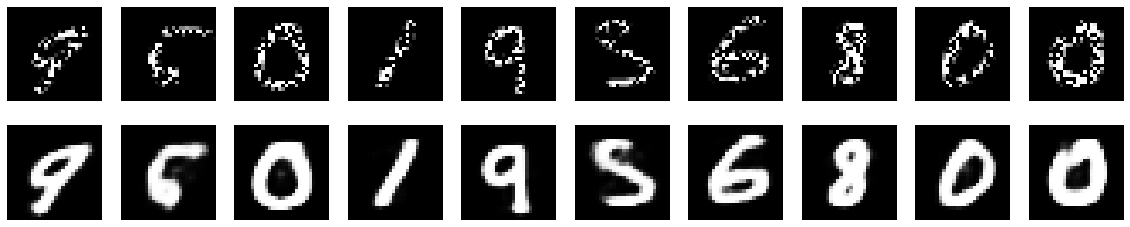

noisy_level =0.9


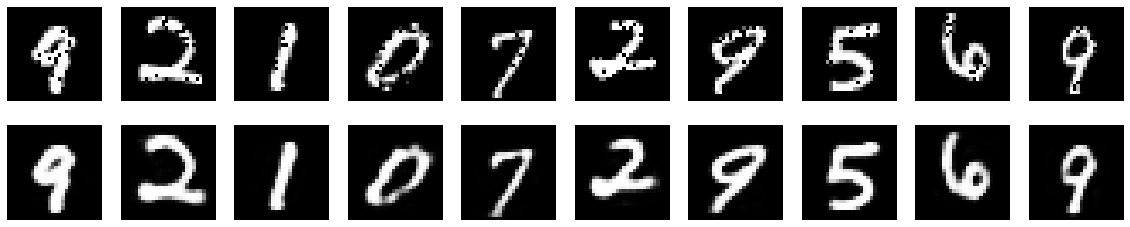

In [53]:
d=[1,5,9]
x_corrup=[noisy_x_test_01,noisy_x_test_05,noisy_x_test_09]

for l in range(len(d)):
  
    from keras.models import load_model
    autoencoder=load_model('basic_autoencoder_noisy_768x64_0'+str(d[l])+'.h5')
    encoder=load_model('basic_encoder_noisy_768x64.h5_0'+str(d[l])+'.h5')
    decoder=load_model('basic_decoder_noisy_768x64.h5_0'+str(d[l])+'.h5')
    ...#load other stuff
    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)
    import matplotlib.pyplot as plt
    n = 10
    plt.figure(figsize=(20, 4))
    print('noisy_level =0.'+str(d[l]))
    for i in range(n):
        j = np.random.randint(0,len(x_test))
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_corrup[l][j].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[j].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

*Comentario: Se puede apreciar que para valores bajos de 'p' al modelo le cuesta mas recontruir la imagen ya que contiene mayor ruido las imagenes, ésto de acuerdo a los errores de validación vistos. A la vez para un valor de ruido p=0.1, es complicado para una persona distinguir correctamente los números, siendo los resultados de la red similares a los que uno podría llegar a catalogar. Se ve que tanto para los dAE de nivel de ruido 0.5 y 0.9 se logran resultados de alta calidad, reconstruyendo la imágen de buena forma visualmente.*

> **c)** Se utiliza la representación reducida, generada por el denoising AE, para medir el desempeño en clasificación (vı́a kNN como en la sección anterior).

Se cargan los distintos autoencoder y encoder asociado a los distintos niveles de ruido (0.1, 0.5, 0.9) y se evalúa el desempeño en clasificacion mediante KNN.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model
import numpy as np
d=[1,5,9]
x_traink=[noisy_x_train_01,noisy_x_train_05,noisy_x_train_09]
x_testk=[noisy_x_test_01,noisy_x_test_05,noisy_x_test_09]
i=0
for l in range(len(d)):
  
    from keras.models import load_model
    autoencoder=load_model('basic_autoencoder_noisy_768x64_0'+str(d[l])+'.h5')
    encoder=load_model('basic_encoder_noisy_768x64.h5_0'+str(d[l])+'.h5')
    decoder=load_model('basic_decoder_noisy_768x64.h5_0'+str(d[l])+'.h5') 
    
    from sklearn.neighbors import KNeighborsClassifier
    
    ...#AUTOENCODER
    encoded_train = encoder.predict(x_traink[i])
    encoded_test = encoder.predict(x_testk[i])
    ...#CLASIFICATION
    i+=1
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    print ('Classification Accuracy noisy=0.'+str(d[l]),   clf.score(encoded_test,y_test))
    ...#CLASIFICATION
    print('')
    print('')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Classification Accuracy noisy=0.1 0.6534




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Classification Accuracy noisy=0.5 0.9352




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Classification Accuracy noisy=0.9 0.9613




*Comentario : Se observa en base a los resultados obtenidos lo robusto del modelo ante el ruido, el cual alcanza predicciones superiores al 93%  en clasificacion para niveldes de ruido de 0.5 y 0.9, a la vez para un nivel de ruido de 0.1 se obtiene un accuracy inferior dada la alta distorsión de la imágen, lo cual concuerda con lo observado de manera visual en el item anterior.*

> **d)** Se diseña otra manera de generar imágenes corruptas del dataset MNIST.

Se generan nuevas imagenes ruidosas mediante una matriz de ruido gaussina .

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_data = x_train.astype('float32') / 255.
x_train=x_data[:55000]
x_val=x_data[55000:]
x_test = x_test.astype('float32') / 255.


x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  
x_val = np.reshape(x_val, (len(x_val), 28, 28, 1))  

noise_factor = 0.5
x_train_noisy05 = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy05 = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_val_noisy05 = x_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape)

x_train_noisy05 = np.clip(x_train_noisy05, 0., 1.)
x_test_noisy05 = np.clip(x_test_noisy05, 0., 1.)
x_val_noisy05 = np.clip(x_val_noisy05, 0., 1.)

Se procede a entrenar un dAE

In [48]:
noisy_x_train=x_train_noisy05
noisy_x_val=x_val_noisy05
noisy_x_test=x_test_noisy05

noisy_g_x_train = noisy_x_train.reshape((len(noisy_x_train), np.prod(noisy_x_train.shape[1:])))
noisy_g_x_val = noisy_x_val.reshape((len(noisy_x_val), np.prod(noisy_x_val.shape[1:])))
noisy_g_x_test = noisy_x_test.reshape((len(noisy_x_test), np.prod(noisy_x_test.shape[1:])))

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 
eps=40
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history_ns20=autoencoder.fit(noisy_g_x_train, x_train, epochs=eps,verbose=1, batch_size=32, validation_data=(noisy_g_x_val, x_val))
train_loss = history_ns20.history['loss']
val_loss  = history_ns20.history['val_loss']

autoencoder.save('basic_autoencoder_noisy2.0_768x64_0.5.h5')
encoder.save('basic_encoder_noisy2.0_768x64_0.5.h5')
decoder.save('basic_decoder_noisy2.0_768x64_0.5.h5')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 8s 145us/step - loss: 0.2444 - val_loss: 0.1970
Epoch 2/40
55000/55000 [==============================] - 7s 133us/step - loss: 0.1793 - val_loss: 0.1664
Epoch 3/40
55000/55000 [==============================] - 7s 133us/step - loss: 0.1580 - val_loss: 0.1515
Epoch 4/40
55000/55000 [==============================] - 7s 134us/step - loss: 0.1464 - val_loss: 0.1431
Epoch 5/40
55000/55000 [==============================] - 7s 132us/step - loss: 0.1394 - val_loss: 0.1376
Epoch 6/40
55000/55000 [==============================] - 7s 130us/step - loss: 0.1347 - val_loss: 0.1337
Epoch 7/40
55000/55000 [==============================] - 7s 130us/step - loss: 0.1313 - val_loss: 0.1309
Epoch 8/40
55000/55000 [==============================] - 7s 131us/step - loss: 0.1286 - val_loss: 0.1286
Epoch 9/40
55000/55000 [==============================] - 7s 133us/step - loss: 0.1266 - val_loss: 0.12

Se grafica el resultado obtenido

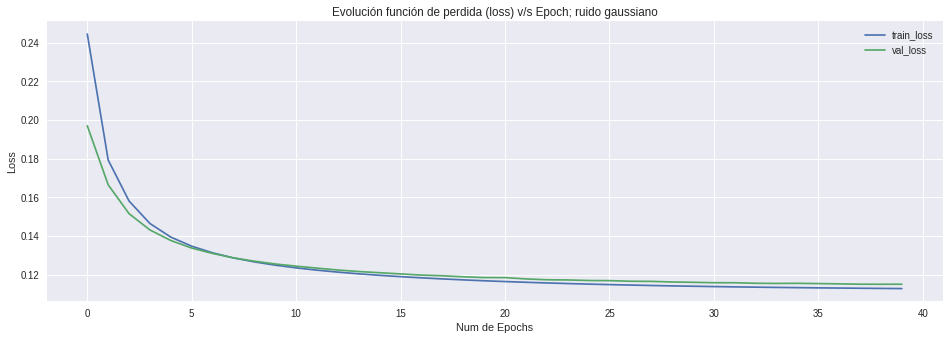

In [49]:
import matplotlib.pyplot as plt
xc         = range(eps)
plt.figure()
plt.figure(figsize=(8,4), dpi=70)
plt.plot(xc,train_loss ,label = "train_loss")
plt.plot(xc, val_loss,label = "val_loss")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch; ruido gaussiano')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')
plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=0.6,wspace=0.1)
plt.show()

*Comentario: Se ve que el dAE sí es capaz de reconstruir la imágen en base al error de validación, a continuación se verá qué tan bien lo hace, de forma visual y métrica.*

Se procede a visualizar tanto la imagen con ruido como la salida del dAE entrenado

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


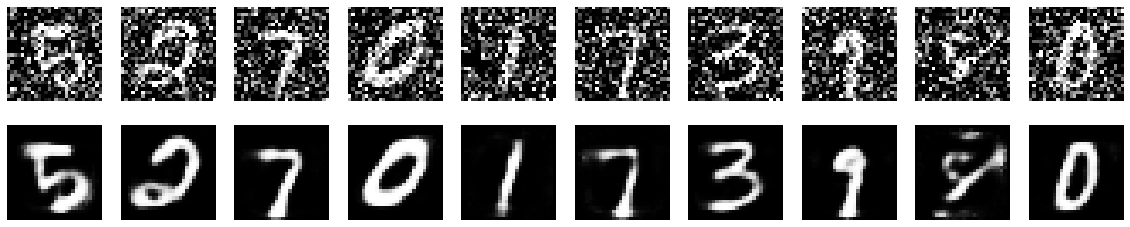

In [52]:
t=0

from keras.models import load_model
autoencoder=load_model('basic_autoencoder_noisy2.0_768x64_0.5.h5')
encoder=load_model('basic_encoder_noisy2.0_768x64_0.5.h5')
decoder=load_model('basic_decoder_noisy2.0_768x64_0.5.h5')
...#load other stuff
encoded_test = encoder.predict(x_test)
decoded_test = decoder.predict(encoded_test)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    j = np.random.randint(0,len(x_test))
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_g_x_test [j].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[j].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
t+=1
plt.show()

*Comentario: El ruido gaussiano distorsiona la totalidad de la imagen, humanamente es posible distinguir los números, con excepción del penúltimo mostrado, el cual tanto nosotros como el dAE fallamos en encontrar su representación, para los demás datos tanto la el dAE como nosotros somos capaces de distinguir los números.*

Desempeño clasificacion respecto al ruido gaussiano.

In [61]:

from keras.models import load_model
autoencoder=load_model('basic_autoencoder_noisy2.0_768x64_0.5.h5')
encoder=load_model('basic_encoder_noisy2.0_768x64_0.5.h5')
decoder=load_model('basic_decoder_noisy2.0_768x64_0.5.h5') 

from sklearn.neighbors import KNeighborsClassifier

...#AUTOENCODER
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)
...#CLASIFICATION

clf = KNeighborsClassifier(10)
clf.fit(encoded_train, y_train)
print ('Classification Accuracy noisy gaussiano',   clf.score(encoded_test,y_test))
...#CLASIFICATION
print('')
print('')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Classification Accuracy noisy gaussiano 0.968




*Comentario: Dado el accuracy obtenido se aprecia que el dAE logra un buen resultado juzgando por la dificultad de la tarea*

### 2.3 Similarity reconstruct

En esta sección se explorará una forma diferente de implementar un autoencoder que es utilizar la arquitectura del autoencoder pero no para reconstruir el mismo dato, sino que para reconstruir un dato similar. En este caso la similaridad estará dada por las clases de los datos.

> **a)** Se generan pares de objetos (𝑜𝑏𝑗𝑒𝑡𝑜,𝑠𝑖𝑚𝑖𝑙𝑎𝑟) con 10 datos similares al dato "objeto", para ésto se utiliza la función que se provee a continuación sobre los primeros (1000 a 2000) datos de entrenamiento.

Se procede a descargar los datos de las imagenes  desde (mnist).

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

*Comentario: Para su correcto uso los datos se deben escalar y transformar en vector colunma .*

In [0]:
def similarity_data(X,Y,sim):
    index_classes = [ np.where(Y==number)[0] for number in range(10)]
    new_X = np.zeros((1,X.shape[1]))
    simi_X = np.zeros((1,X.shape[1]))
    for x,y in zip(X,Y):
        similarities = index_classes[y]
        sample_sim = np.random.choice(similarities,sim)
        new_X = np.concatenate((new_X, np.tile(x,(sim,1))),axis=0)
        simi_X = np.concatenate((simi_X, X[sample_sim]),axis=0)
    return new_X[1:],simi_X[1:]


*Comentario: Se busca crear datas con imagenes similares o sea que contengan la misma etiqueta para esto se utilizan los data set  x_train  e  y_train para asi poder ir ordenando los pares de imagenes de igual etiqueta.*

In [0]:
data, data_sim = similarity_data(x_train[:2000],y_train[:2000],10)

Se procede a visualizar distintos pares de imagenes.

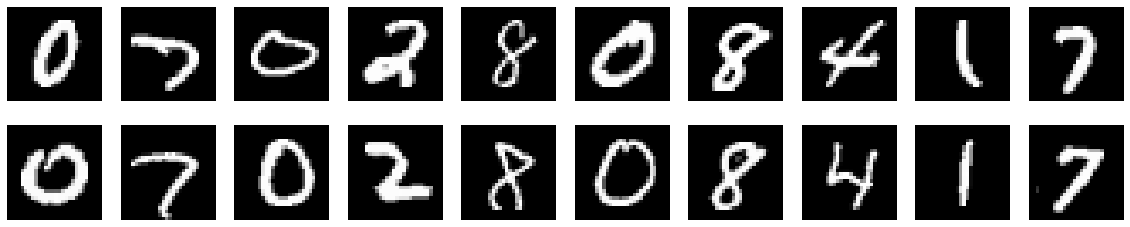

In [0]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    j = np.random.randint(0,len(data))
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data[j].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(data_sim[j].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

*Comentario: Se observa que los pares de imagenes efectivamente presentan la misma etiqueta y representan distintas imagenes lo cual podria ser util para alimentar una red en la tarea de auto-etiquetado de imagenes.*

> **b)** Se escoge un arquitectura shallow de dimensionalidad 128 y se procede a entrenar.

No se manteniene la funcion de pérdida ya que se busca obtener una aproximacion de la imagen no exactamente la misma, por lo que la comparación que debiese entrar en la función de pérdida ya no es binaria, por esto se experimenta con la función MSE.

In [95]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(128,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='mse')
history23=autoencoder.fit(data,data_sim,epochs=100,batch_size=32,validation_split=0.2)
decoder.save('my_decoder_768x1000x500x250x64_23.h5')
encoder.save('my_encoder_768x1000x500x250x64_23.h5')
autoencoder.save('my_autoencoder_768x1000x500x250x64_23.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 4s 275us/step - loss: 0.0876 - val_loss: 0.0684
Epoch 2/100
16000/16000 [==============================] - 2s 140us/step - loss: 0.0666 - val_loss: 0.0659
Epoch 3/100
16000/16000 [==============================] - 2s 139us/step - loss: 0.0642 - val_loss: 0.0636
Epoch 4/100
16000/16000 [==============================] - 2s 141us/step - loss: 0.0623 - val_loss: 0.0620
Epoch 5/100
16000/16000 [==============================] - 2s 139us/step - loss: 0.0611 - val_loss: 0.0612
Epoch 6/100
16000/16000 [==============================] - 2s 140us/step - loss: 0.0603 - val_loss: 0.0605
Epoch 7/100
16000/16000 [==============================] - 2s 138us/step - loss: 0.0598 - val_loss: 0.0601
Epoch 8/100
16000/16000 [==============================] - 2s 140us/step - loss: 0.0594 - val_loss: 0.0598
Epoch 9/100
16000/16000 [==============================] - 2s 141us/step - loss: 0.0591 - val_l

> c) Se visualiza lo que genera el autoencoder dado una imagen de entrada. Además se visualiza, con la herramienta TSNE, los embedding/representación reducida que se producen en el encoder.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


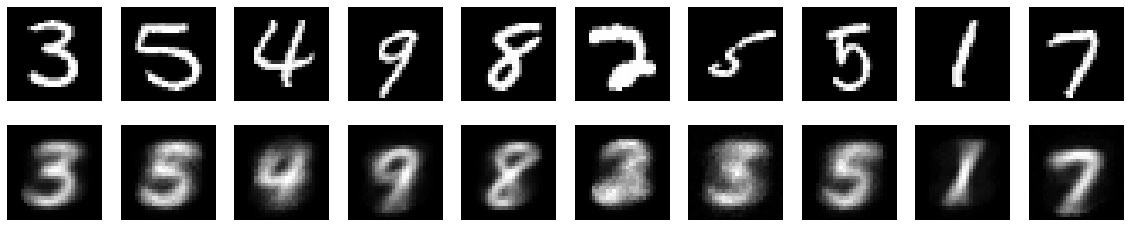

In [96]:
from keras.models import load_model
autoencoder = load_model('my_autoencoder_768x1000x500x250x64_23.h5')
encoder = load_model('my_encoder_768x1000x500x250x64_23.h5')
decoder=load_model('my_decoder_768x1000x500x250x64_23.h5')
encoded_test = encoder.predict(data)
decoded_test = decoder.predict(encoded_test)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    j = np.random.randint(0,len(data))
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data[j].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[j].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

*Comentario: Se oberva un no tan buen desmpeño en la recontruccion, dado que se obtienen datos borrosos, se visualiza como si estuviese en un proceso de transición la imágen, bien se distinguen los números generados, sin embargo se ven errores en algunos casos mientras en otros se ve que se está yendo en buen camino, la dificultad de generación de imágenes en este caso se ve en que no se logra minimizar el error de validación más de lo estipulado incluso experimentando con encoders profundos, bien lo que produce la imposibilidad de salir adelante puede encontrarse en la función de pérdida utilizada o bien en la mala elección de hiperparámetros.*

Se procede a visualizar el desempeño de la red utilizando la herramienta TSNE

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


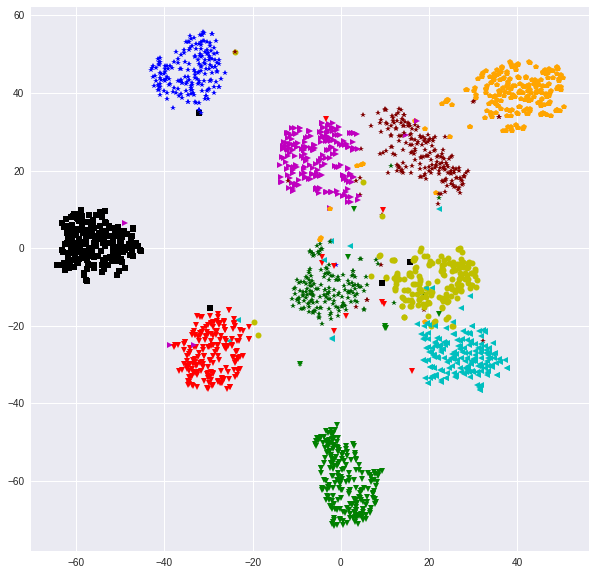

In [0]:
y_train2=y_train[:2000]
from keras.models import load_model
autoencoder = load_model('my_autoencoder_768x1000x500x250x64_23.h5')
encoder = load_model('my_encoder_768x1000x500x250x64_23.h5')
decoder=load_model('my_decoder_768x1000x500x250x64_23.h5')

nplot=2000
encoded_train = encoder.predict(x_train[:nplot])
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'*',1:'v',2: 'v',3:'<',4:'>',5:'o',6:'s',7:'p',8:'*',9:'*'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

*Comentario : Debido a que el modelo reconstruye una imagen de la misma categoría pero no exactamente la misma imagen es que alcanza un buen desempeño en clasificación, sin embargo aún con confusiones claras como se puede observar del grafico. Sin embargo el fin es reconstruir imágenes similares, lo cual anteriormente se ve que falta ajustar al AE para lograr un mejor desempeño*.

**2.4 Pre-training**

En esta sección utilizaremos un AE para pre-entrenar redes profundas. Como hemos discutido en clases, el efecto esperado es regularizar el modelo, posicionando el modelo de partida en una buena zona del espacio de parámetros.

> a) Se construye y entrena una red FF para clasificar las imágenes de MNIST. Utilizando SGD básico con tasa de aprendizaje fija 𝜂=0.01, momentum 𝑚=0.9 y no más de 50 epochs. Para empezar, se utiliza una arquitectura 768×1000×1000×10 y funciones de activación sigmoidales.

Se procede a armar los conjuntos de entrenamiento, validación y test normalizados

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_data = x_train.astype('float32') / 255.
x_train=x_data[:55000]
x_val=x_data[55000:]
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_data = y_train
y_train = y_data[:55000]
y_val = y_data[55000:]

Using TensorFlow backend.


Se transforma la salida en one hot vector con el fin de poder realizar la tarea de categorización, además se constuye el modelo FF de acuerdo a lo dicho y se entrena

In [0]:
from keras.utils import to_categorical
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import History 
model = Sequential()
model.add(Dense(1000, activation='sigmoid', input_shape=(784,)))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()
optimizer_ = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, Y_train,nb_epoch=30, batch_size=25,shuffle=True, validation_data=(x_val, Y_val))
model.save('ReluNet-768x1000x1000x10-NFT-50epochs.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 22s 396us/step - loss: 0.7811 - acc: 0.7500 - val_loss: 0.3257 - val_acc: 0.9056
Epoch 2/30
55000/55000 [==============================] - 20s 360us/step - loss: 0.3601 - acc: 0.8935 - val_loss: 0.2615 - val_acc: 0.9206
Epoch 3/30
55000/55000 [==============================] - 20s 368us/step - loss: 0.3194 - acc: 0.9063 - val_loss: 0.2301 - val_acc: 0.9344
Epoch 4/30
55000/55000 [==============================] - 20s 365us/step - loss: 0.2904 - acc: 0.9136 - val_loss: 0.2303 - val_acc: 0.9316
Epoch 5/30
55000/55000 [==============================] - 20s 364us/step - loss: 0.2663 - acc: 0.9211 - val_loss: 0.1938 - val_acc: 0.9438
Epoch 6/30
55000/55000 [==============================] - 20s 367us/step - loss: 0.2422 - acc: 0.9290 - val_loss: 0.1852 - val_acc: 0.9472
Epoch 7/30
55000/55000 [==============================] - 20s 362us/step - loss: 0.2209 - acc: 0.9349 - val_loss: 0.1

Se almacenan los datos de entrenamiento

In [0]:
datos24={}
train_loss= history.history['loss']
val_loss   = history.history['val_loss']
train_acc = history.history['acc']
val_acc   = history.history['val_acc']
datos24["train_loss"] = train_loss
datos24["val_loss"] = val_loss
datos24["train_acc"] = train_acc
datos24["val_acc"] = val_acc
!pip install -U -q PyDrive
from google.colab import drive
drive.mount('/content/gdrive')
with open('/content/gdrive/My Drive/ColabNoteb/Datos24.json','w') as f:
  json.dump(datos24,f)
with open('/content/gdrive/My Drive/ColabNoteb/Datos24.json') as f:
  datos24=json.load(f)
train_loss=datos24["train_loss"] 
val_loss=datos24["val_loss"]
train_acc=datos24["train_acc"] 
val_acc=datos24["val_acc"]

Se grafican los resultados obtenidos

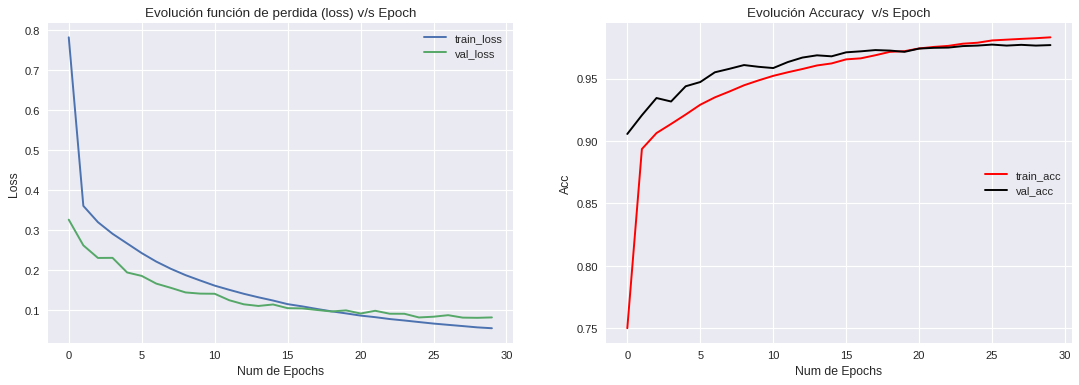

In [0]:
import matplotlib.pyplot as plt
eps=30

xc         = range(eps)

plt.figure()
plt.figure(figsize=(8,4), dpi=80)

plt.subplot(1,2,1)
plt.plot(xc,train_loss ,label = "train_loss")
plt.plot(xc, val_loss ,label = "val_loss")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(xc,train_acc ,'r',label = "train_acc")
plt.plot(xc, val_acc,'k',label = "val_acc")
plt.legend(loc='center right')
plt.title('Evolución Accuracy  v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Acc')



plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=1.2,
                    wspace=0.2)
plt.show()

*Comentario: Se oberva que la red FF presenta un buen desmpeño en la tarea de clasificacion de imagenes tanto en pérdida (loss) obteniéndose un valor menor a 0.1 tanto en accuracy obteniéndose un porcentaje de acierto mayor al 95%.*

> b) Se construye y entrena una red neuronal profunda para clasificar las imágenes de MNIST utilizando la arquitectura propuesta en (a) y pre-entrenando los pesos de cada capa mediante un autoencoder básico. Se procede en modo clásico, es decir, se entrena en modo no supervisado una capa a la vez y tomando como input de cada nivel la representación (entrenada) obtenida en el nivel anterior. Después del entrenamiento se efectúa un entrenamiento supervisado convencional (fine-tunning).

Se procede a entrenar los autoencoders de acuerdo a lo dicho

In [0]:
from keras.datasets import mnist
... ## Load and preprocess MNIST as usual
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_data = x_train.astype('float32') / 255.
x_train=x_data[:55000]
x_val=x_data[55000:]
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_data = y_train
y_train = y_data[:55000]
y_val = y_data[55000:]
eps=20
input_img1 = Input(shape=(784,))

encoded1 = Dense(1000,activation='sigmoid')(input_img1)
decoded1 = Dense(784, activation='sigmoid')(encoded1)
autoencoder1 = Model(inputs=input_img1, outputs=decoded1)
encoder1 = Model(inputs=input_img1, outputs=encoded1)
optimizer_ = SGD(lr=0.01, momentum=0.9)
autoencoder1.compile(optimizer=optimizer_, loss='categorical_crossentropy')
autoencoder1.fit(x_train, x_train, nb_epoch=eps, batch_size=25,shuffle=True, validation_data=(x_val, x_val))
encoded_input1 = Input(shape=(1000,))
autoencoder1.save('autoencoder_layer1.h5')
encoder1.save('encoder_layer1.h5')
x_train_encoded1 = encoder1.predict(x_train)
x_val_encoded1 = encoder1.predict(x_val)
x_test_encoded1 = encoder1.predict(x_test)
input_img2 = Input(shape=(1000,))
encoded2 = Dense(1000, activation='sigmoid')(input_img2)
decoded2 = Dense(1000, activation='sigmoid')(encoded2)
autoencoder2 = Model(inputs=input_img2, outputs=decoded2)
encoder2 = Model(inputs=input_img2, outputs=encoded2)
optimizer_ = SGD(lr=0.01, momentum=0.9)
autoencoder2.compile(optimizer=optimizer_, loss='categorical_crossentropy')
autoencoder2.fit(x_train_encoded1,x_train_encoded1,nb_epoch=eps,batch_size=25,shuffle=True, validation_data=(x_val_encoded1, x_val_encoded1))
encoded_input2 = Input(shape=(1000,))
autoencoder2.save('autoencoder_layer2.h5')
encoder2.save('encoder_layer2.h5')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 23s 426us/step - loss: 553.0655 - val_loss: 532.0394
Epoch 2/20
55000/55000 [==============================] - 23s 409us/step - loss: 527.1506 - val_loss: 519.4128
Epoch 3/20
55000/55000 [==============================] - 22s 404us/step - loss: 519.1726 - val_loss: 514.0927
Epoch 4/20
55000/55000 [==============================] - 23s 420us/step - loss: 515.6902 - val_loss: 510.8258
Epoch 5/20
55000/55000 [==============================] - 23s 414us/step - loss: 513.0286 - val_loss: 509.8991
Epoch 6/20
55000/55000 [==============================] - 23s 413us/step - loss: 511.7779 - val_loss: 508.1977
Epoch 7/20
55000/55000 [==============================] - 20s 367us/step - loss: 510.4569 - val_loss: 507.0081
Epoch 8/20
55000/55000 [==============================] - 21s 389us/step - loss: 509.5354 - val_loss: 506.6667
Epoch 9/20
55000/55000 [==============================] - 22s 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 25s 447us/step - loss: 3007.6084 - val_loss: 2998.8038
Epoch 2/20
55000/55000 [==============================] - 24s 434us/step - loss: 2996.3018 - val_loss: 2997.2819
Epoch 3/20
55000/55000 [==============================] - 23s 426us/step - loss: 2995.4650 - val_loss: 2996.8076
Epoch 4/20
55000/55000 [==============================] - 24s 433us/step - loss: 2995.1434 - val_loss: 2996.6003
Epoch 5/20
55000/55000 [==============================] - 24s 438us/step - loss: 2994.9684 - val_loss: 2996.4519
Epoch 6/20
55000/55000 [==============================] - 24s 429us/step - loss: 2994.8541 - val_loss: 2996.3699
Epoch 7/20
55000/55000 [==============================] - 23s 426us/step - loss: 2994.7715 - val_loss: 2996.2999
Epoch 8/20
55000/55000 [==============================] - 24s 436us/step - loss: 2994.7085 - val_loss: 2996.2320
Epoch 9/20
55000/55000 [=======================

NameError: ignored

Se procede a entrenar la red feed forward con lo obtenido

In [0]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(1000, activation='sigmoid', input_shape=(784,)))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Dense(1000, activation='sigmoid'))
model.layers[-1].set_weights(autoencoder2.layers[1].get_weights())
model.add(Dense(10, activation='softmax'))
model.summary()
optimizer_ = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer_,loss='binary_crossentropy', metrics=['accuracy'])
historyyy=model.fit(x_train, Y_train,nb_epoch=20, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('Net-768x1000x1000x10-finetunned.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 14s 249us/step - loss: 0.1198 - acc: 0.9582 - val_loss: 0.0567 - val_acc: 0.9835
Epoch 2/20
55000/55000 [==============================] - 14s 246us/step - loss: 0.0618 - acc: 0.9801 - val_loss: 0.0452 - val_acc: 0.9864
Epoch 3/20
55000/55000 [==============================] - 13s 245us/step - loss: 0.0537 - acc: 0.9824 - val_loss: 0.0412 - val_acc: 0.9870
Epoch 4/20
55000/55000 [==============================] - 13s 245us/step - loss: 0.0496 - acc: 0.9836 - val_loss: 0.0377 - val_acc: 0.9879
Epoch 5/20
55000/55000 [==============================] - 13s 245us/step - loss: 0.0472 - acc: 0.9845 - val_loss: 0.0365 - val_acc: 0.9883
Epoch 6/20
55000/55000 [==============================] - 14s 246us/step - loss: 0.0452 - acc: 0.9853 - val_loss: 0.0349 - val_acc: 0.9892
Epoch 7/20
55000/55000 [==============================] - 13s 245us/step - loss: 0.0435 - acc: 0.9858 - val_loss: 0.0

Se procede a graficar lo obtenido

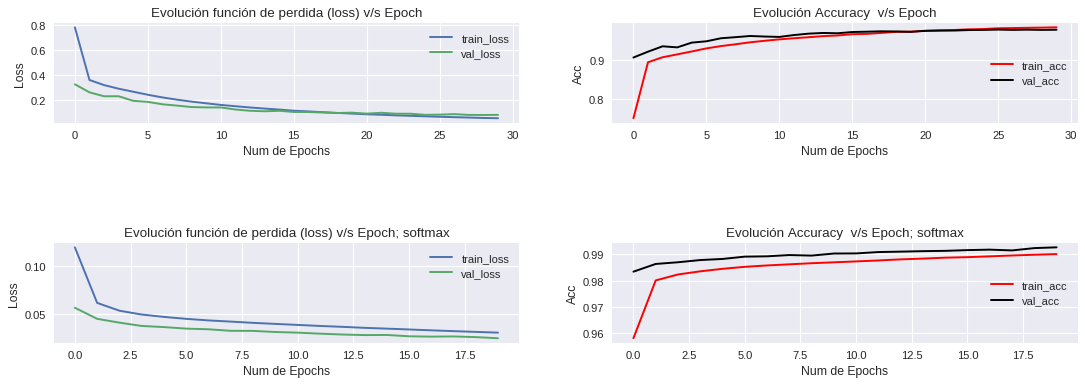

In [0]:
train_loss= history.history['loss']
val_loss   = history.history['val_loss']

train_acc = history.history['acc']
val_acc   = history.history['val_acc']

train_loss_ent2= historyyy.history['loss']
val_loss_ent2  = historyyy.history['val_loss']

train_acc_ent2 = historyyy.history['acc']
val_acc_ent2   = historyyy.history['val_acc']


import matplotlib.pyplot as plt
eps=30
eps2=20

xc         = range(eps)
xc2=range(eps2)

plt.figure()
plt.figure(figsize=(8,4), dpi=80)

plt.subplot(2,2,1)
plt.plot(xc,train_loss ,label = "train_loss")
plt.plot(xc, val_loss ,label = "val_loss")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(xc,train_acc ,'r',label = "train_acc")
plt.plot(xc, val_acc,'k',label = "val_acc")
plt.legend(loc='center right')
plt.title('Evolución Accuracy  v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Acc')

plt.subplot(2,2,3)
plt.plot(xc2,train_loss_ent2 ,label = "train_loss")
plt.plot(xc2, val_loss_ent2 ,label = "val_loss")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch; pesos preentrenados')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(xc2,train_acc_ent2 ,'r',label = "train_acc")
plt.plot(xc2, val_acc_ent2,'k',label = "val_acc")
plt.legend(loc='center right')
plt.title('Evolución Accuracy  v/s Epoch; pesos preentrenados')
plt.xlabel('Num de Epochs')
plt.ylabel('Acc')




plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=1.2,
                    wspace=0.2)
plt.show()

*Comentario: Se aprecia que el resultado obtenido es de mayor calidad, alcanzando aproximadamente el 99% de accuracy, incluso aún cuando se presenta unknown fitting en el proceso de entrenamiento, siendo que a la red le falta aun por entrenar.*

> c) Se repite el entrenamiento usando funciones de activación tanh.

Se repite el precediemiento utlizando funciones de activacion tanh y utilizando los mismos pesos preentrenados .

In [0]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(1000, activation='tanh', input_shape=(784,)))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Dense(1000, activation='tanh'))
model.layers[-1].set_weights(autoencoder2.layers[1].get_weights())
model.add(Dense(10, activation='sigmoid'))
model.summary()
optimizer_ = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer_,loss='binary_crossentropy', metrics=['accuracy'])
historyyy2=model.fit(x_train, Y_train,nb_epoch=20, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('Net-768x1000x1000x10-finetunned_tanh.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_26 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_27 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 14s 249us/step - loss: 0.0872 - acc: 0.9705 - val_loss: 0.0475 - val_acc: 0.9862
Epoch 2/20
55000/55000 [==============================] - 13s 240us/step - loss: 0.0495 - acc: 0.9843 - val_loss: 0.0384 - val_acc: 0.9888
Epoch 3/20
55000/55000 [==============================] - 13s 240us/step - loss: 0.0398 - acc: 0.9875 - val_loss: 0.0334 - val_acc: 0.9901
Epoch 4/20
55000/55000 [==============================] - 13s 242us/step - loss: 0.0332 - acc: 0.9898 - val_loss: 0.0296 - val_acc: 0.9914
Epoch 5/20
55000/55000 [==============================] - 13s 242us/step - loss: 0.0284 - acc: 0.9915 - val_loss: 0.0270 - val_acc: 0.9920
Epoch 6/20
55000/55000 [==============================] - 13s 241us/step - loss: 0.0245 - acc: 0.9929 - val_loss: 0.0248 - val_acc: 0.9929
Epoch 7/20
55000/55000 [==============================] - 13s 242us/step - loss: 0.0214 - acc: 0.9938 - val_loss: 0.0

Se procede a graficar el resultado obtenido

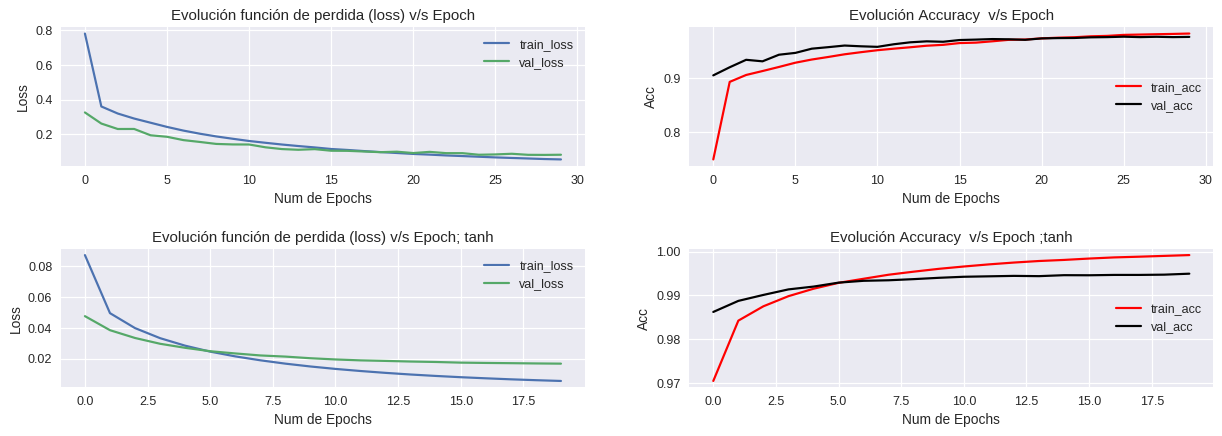

In [0]:
train_loss= history.history['loss']
val_loss   = history.history['val_loss']
train_acc = history.history['acc']
val_acc   = history.history['val_acc']
train_loss_ent2= historyyy2.history['loss']
val_loss_ent2  = historyyy2.history['val_loss']
train_acc_ent2 = historyyy2.history['acc']
val_acc_ent2   = historyyy2.history['val_acc']
import matplotlib.pyplot as plt
eps=30
eps2=20
xc         = range(eps)
xc2=range(eps2)
plt.figure()
plt.figure(figsize=(8,4), dpi=90)
plt.subplot(2,2,1)
plt.plot(xc,train_loss ,label = "train_loss")
plt.plot(xc, val_loss ,label = "val_loss")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,2)
plt.plot(xc,train_acc ,'r',label = "train_acc")
plt.plot(xc, val_acc,'k',label = "val_acc")
plt.legend(loc='center right')
plt.title('Evolución Accuracy  v/s Epoch')
plt.xlabel('Num de Epochs')
plt.ylabel('Acc')

plt.subplot(2,2,3)
plt.plot(xc2,train_loss_ent2 ,label = "train_loss")
plt.plot(xc2, val_loss_ent2 ,label = "val_loss")
plt.legend(loc='upper right')
plt.title('Evolución función de perdida (loss) v/s Epoch; tanh')
plt.xlabel('Num de Epochs')
plt.ylabel('Loss')

plt.subplot(2,2,4)
plt.plot(xc2,train_acc_ent2 ,'r',label = "train_acc")
plt.plot(xc2, val_acc_ent2,'k',label = "val_acc")
plt.legend(loc='center right')
plt.title('Evolución Accuracy  v/s Epoch ;tanh')
plt.xlabel('Num de Epochs')
plt.ylabel('Acc')




plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=0.6,
                    wspace=0.2)
plt.show()

*Comentario: Se observa de los graficos que utilizando funcion de activacion tanh mejora aún más lo obtenido por la red, revirtiéndose prontamente la situación de unknown fitting, y lográndose un accuracy de aproximadamente 99.5%. Ésto debido a que la función tanh posee una derivada que ayuda realizar un mejor proceso de entrenamiento por medio del cálculo de backpropagation para realizar la actualización de pesos, bien por medio de un entrenamiento más largo, en tanto a epochs ha de ser posible obtener un resultado favorable con la utilización de la función de activación softmax, la cual suele ser preferida en aplicaciones de clasificación múltiple.*